In [2]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

## Q1. Load the Credit dataset file into Python DataFrame. 


In [3]:
data=pd.read_csv('germanCreditDefault.csv')
data.shape

(1000, 17)

In [265]:
data.head().T

,0,1,2,3,4
checking_balance,< 0 DM,1 - 200 DM,unknown,< 0 DM,< 0 DM
months_loan_duration,6,48,12,42,24
credit_history,critical,good,critical,good,poor
purpose,furniture/appliances,furniture/appliances,education,furniture/appliances,car
amount,1169,5951,2096,7882,4870
savings_balance,unknown,< 100 DM,< 100 DM,< 100 DM,< 100 DM
employment_duration,> 7 years,1 - 4 years,4 - 7 years,4 - 7 years,1 - 4 years
percent_of_income,4,2,2,2,3
years_at_residence,4,2,3,4,4
age,67,22,49,45,53


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. 

# Q2. Print 10 samples from the dataset

In [4]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
checking_balance,< 0 DM,1 - 200 DM,unknown,< 0 DM,< 0 DM,unknown,unknown,1 - 200 DM,unknown,1 - 200 DM
months_loan_duration,6,48,12,42,24,36,24,36,12,30
credit_history,critical,good,critical,good,poor,good,good,good,good,critical
purpose,furniture/appliances,furniture/appliances,education,furniture/appliances,car,education,furniture/appliances,car,furniture/appliances,car
amount,1169,5951,2096,7882,4870,9055,2835,6948,3059,5234
savings_balance,unknown,< 100 DM,< 100 DM,< 100 DM,< 100 DM,unknown,500 - 1000 DM,< 100 DM,> 1000 DM,< 100 DM
employment_duration,> 7 years,1 - 4 years,4 - 7 years,4 - 7 years,1 - 4 years,1 - 4 years,> 7 years,1 - 4 years,4 - 7 years,unemployed
percent_of_income,4,2,2,2,3,2,3,2,2,4
years_at_residence,4,2,3,4,4,4,4,2,4,2
age,67,22,49,45,53,35,53,35,61,28


# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_duration     1000 non-null object
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null object
housing                 1000 non-null object
existing_loans_count    1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
phone                   1000 non-null object
default                 1000 non-null object
dtypes: int64(7), object(10)
memory usage: 132.9+ KB


In [6]:
data.shape

(1000, 17)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [7]:
data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


# Q5 Covert categorical columns to numericals. Loops through each column and checks if the column type is object then converts those columns into numerical.

Or Encode all categorical variables into numbers so that you can apply models to it.

In [8]:
for feature in data.columns:
    if data[feature].dtypes=='object':
        data[feature]=pd.Categorical(data[feature]).codes 

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
checking_balance        1000 non-null int8
months_loan_duration    1000 non-null int64
credit_history          1000 non-null int8
purpose                 1000 non-null int8
amount                  1000 non-null int64
savings_balance         1000 non-null int8
employment_duration     1000 non-null int8
percent_of_income       1000 non-null int64
years_at_residence      1000 non-null int64
age                     1000 non-null int64
other_credit            1000 non-null int8
housing                 1000 non-null int8
existing_loans_count    1000 non-null int64
job                     1000 non-null int8
dependents              1000 non-null int64
phone                   1000 non-null int8
default                 1000 non-null int8
dtypes: int64(7), int8(10)
memory usage: 64.5 KB


# Q6 See the distribution of 'default' variable and plot it using appropriate graph.

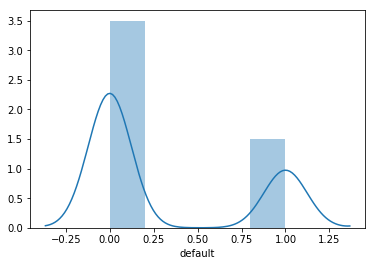

In [10]:
sns.distplot(data['default'])

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [11]:
data.corr()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
checking_balance,1.000000,-0.096005,-0.155113,0.029666,-0.092638,0.097452,-0.030032,0.029780,0.008835,0.083636,0.052184,-0.012511,0.084513,-0.029085,0.030417,0.037208,-0.302406
months_loan_duration,-0.096005,1.000000,0.148239,-0.128694,0.624984,0.020843,0.003824,0.074749,0.034067,-0.036136,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.214927
credit_history,-0.155113,0.148239,1.000000,-0.094504,0.109598,-0.073245,-0.053245,-0.016986,-0.031805,-0.057085,-0.066258,-0.015954,-0.177467,-0.009165,0.057804,-0.004388,0.193730
purpose,0.029666,-0.128694,-0.094504,1.000000,-0.210375,-0.001288,-0.027556,0.108289,-0.049809,-0.097851,0.060079,0.055853,-0.081676,0.047388,-0.116408,-0.135896,-0.055675
amount,-0.092638,0.624984,0.109598,-0.210375,1.000000,0.070127,0.038756,-0.271316,0.028926,0.032716,-0.020224,-0.135632,0.020795,-0.261139,0.017142,0.276995,0.154739
savings_balance,0.097452,0.020843,-0.073245,-0.001288,0.070127,1.000000,0.056865,0.032940,0.038741,0.094760,0.000726,-0.032711,0.015568,-0.040662,0.023693,0.075988,-0.103133
employment_duration,-0.030032,0.003824,-0.053245,-0.027556,0.038756,0.056865,1.000000,0.074664,0.218838,0.289741,-0.052460,-0.126529,0.085495,-0.142279,0.028019,0.110568,0.008932
percent_of_income,0.029780,0.074749,-0.016986,0.108289,-0.271316,0.032940,0.074664,1.000000,0.049302,0.058266,0.041423,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.072404
years_at_residence,0.008835,0.034067,-0.031805,-0.049809,0.028926,0.038741,0.218838,0.049302,1.000000,0.266419,-0.039284,-0.011941,0.089625,0.000450,0.042643,0.095359,0.002967
age,0.083636,-0.036136,-0.057085,-0.097851,0.032716,0.094760,0.289741,0.058266,0.266419,1.000000,-0.043787,-0.301419,0.149254,-0.001637,0.118201,0.145259,-0.091127


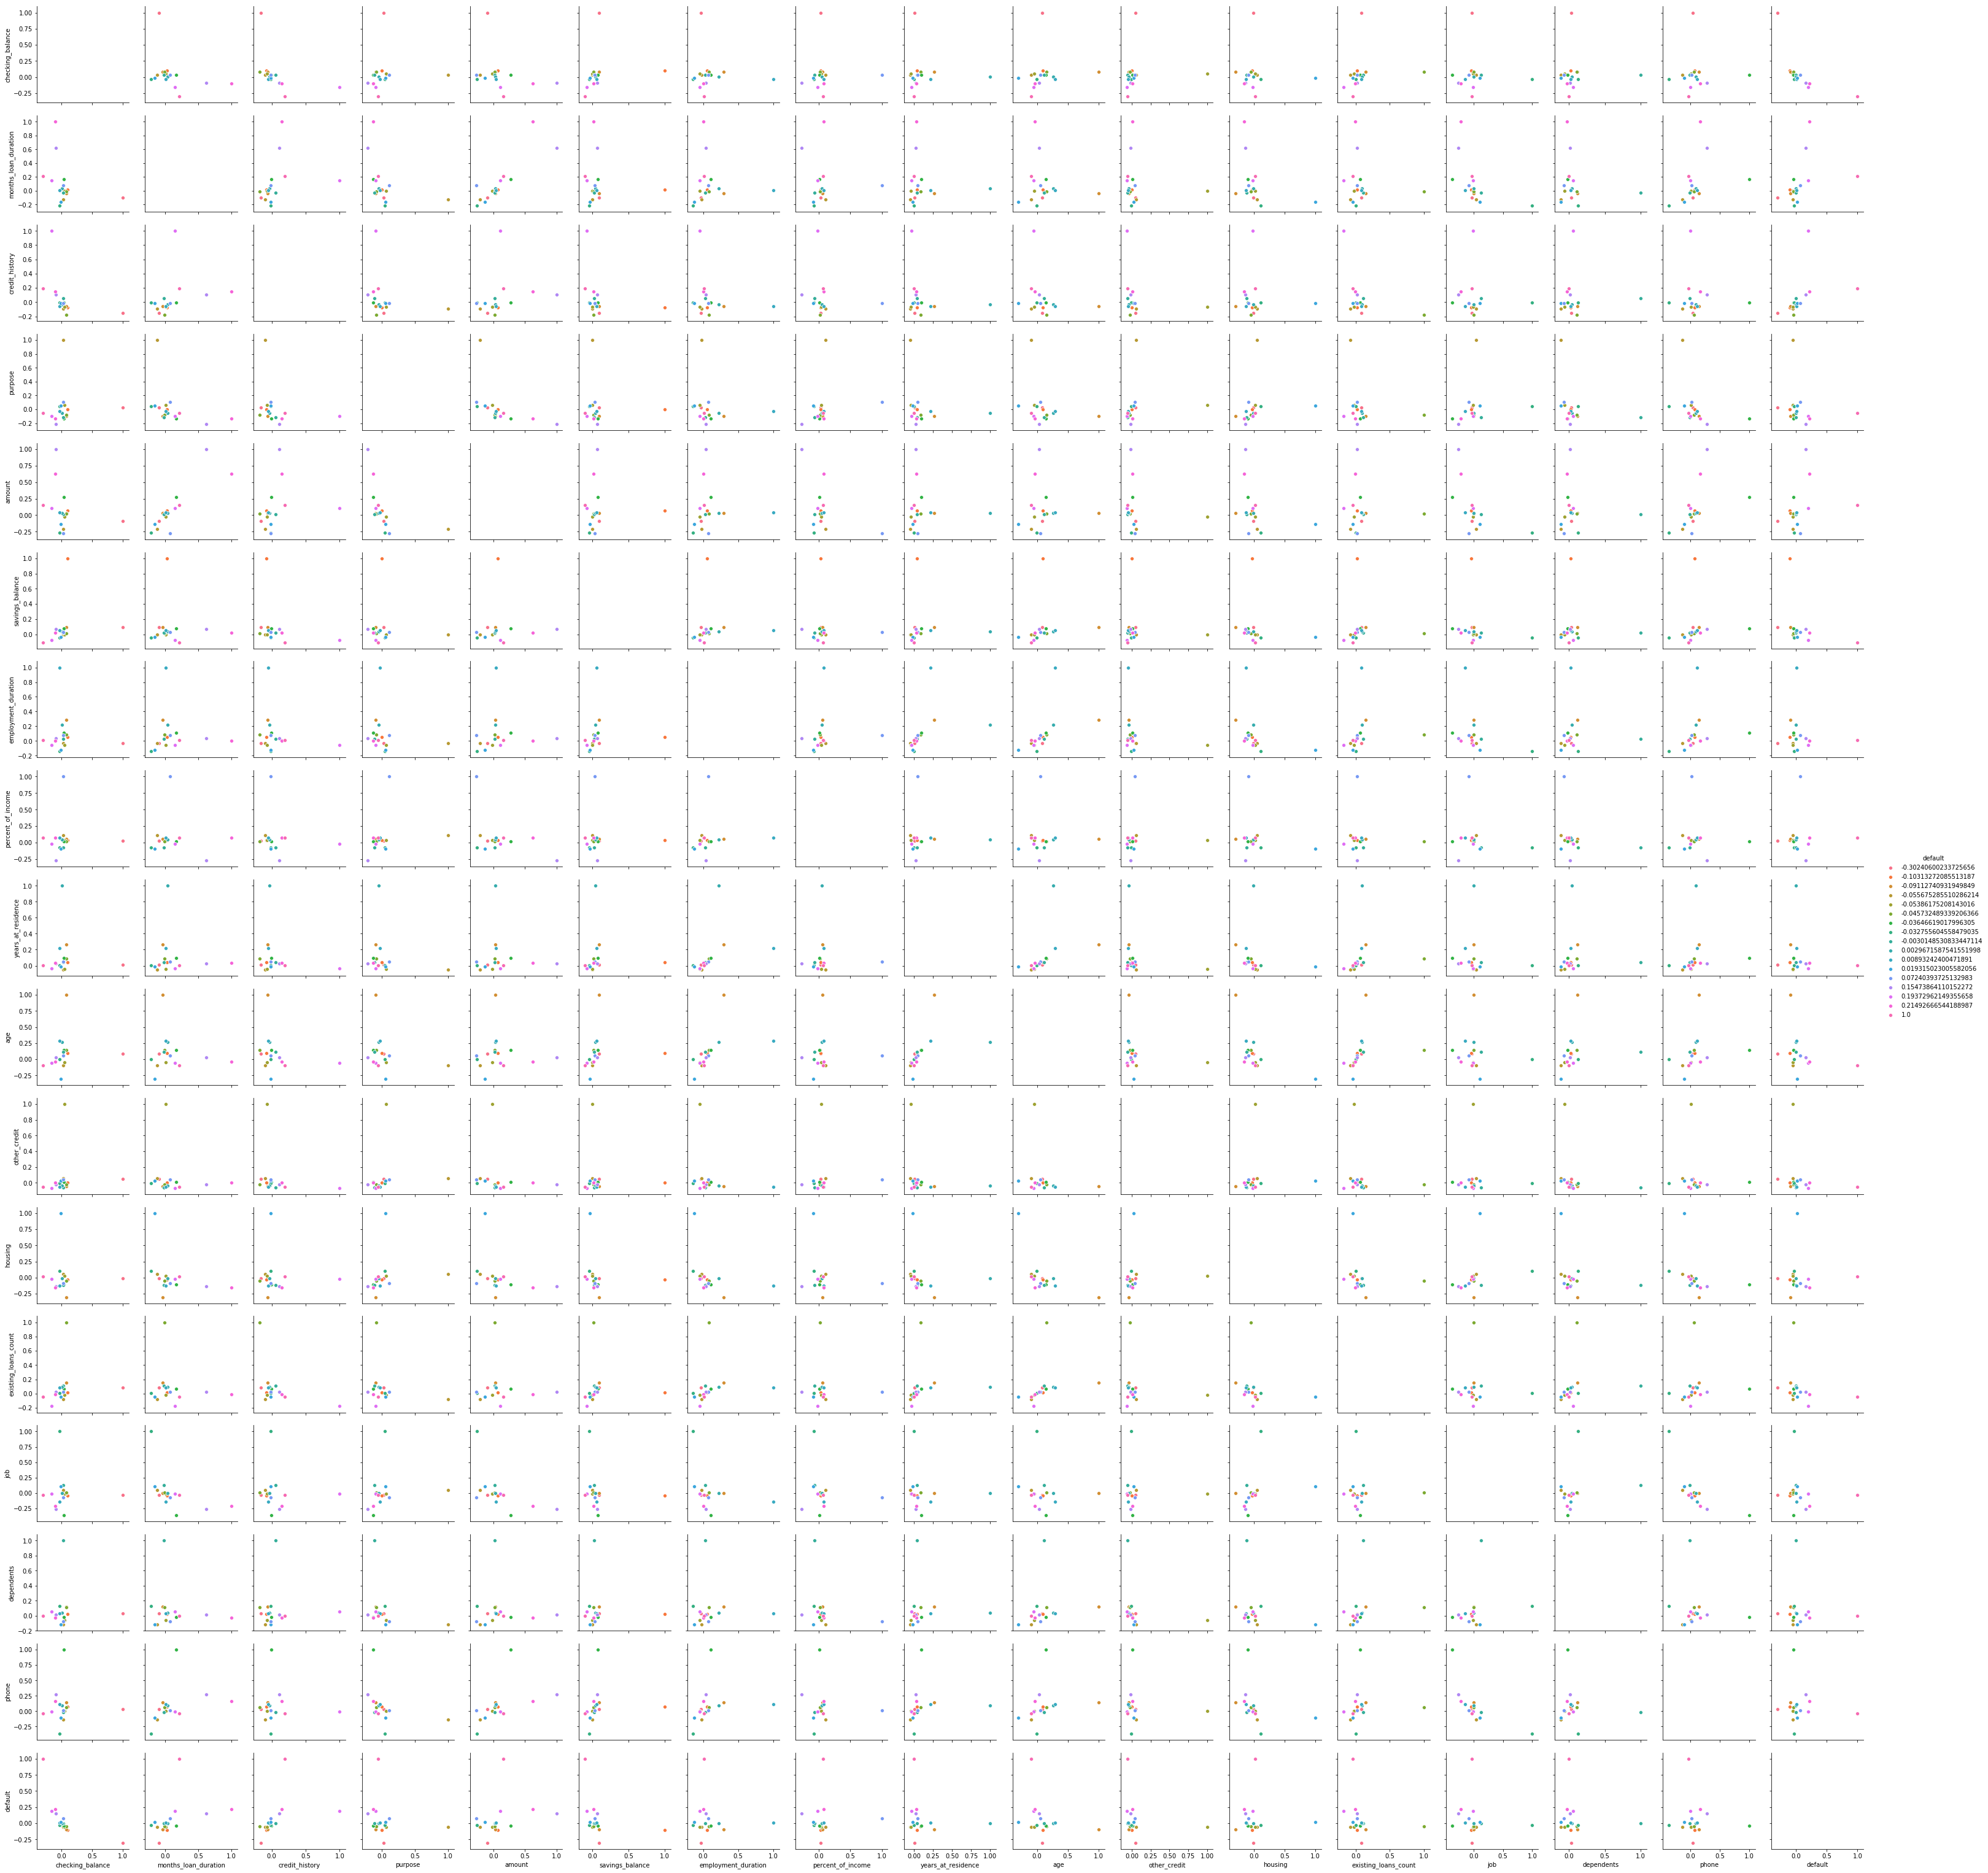

In [12]:
sns.pairplot(data.corr(),hue='default')

In [274]:
# Monthly Loan duration has a high positive correlation with Amount
# There is no high positive or negative correlation between different variables in dataset

# Q8 Split the dataset into training and test set in the ratio of 70:30 (Training:Test).</b>


In [20]:
X=data.drop('default',axis=1)
y=data[['default']]
X = X.apply(zscore)

In [21]:
test_size=0.30
seed=7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [22]:
dtmodel=DecisionTreeClassifier(criterion='entropy')
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [25]:
ypred=dtmodel.predict(X_test)
Accuracy=metrics.accuracy_score(ypred,y_test)
print(Accuracy)

0.7066666666666667


In [17]:
ConfusionMatrix=metrics.confusion_matrix(ypred,y_test)
print(ConfusionMatrix)

[[162  40]
 [ 55  43]]


In [29]:
print (pd.DataFrame(dtmodel.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
checking_balance      0.101537
months_loan_duration  0.087494
credit_history        0.023046
purpose               0.078211
amount                0.209639
savings_balance       0.022037
employment_duration   0.071138
percent_of_income     0.043883
years_at_residence    0.068047
age                   0.156089
other_credit          0.033876
housing               0.014744
existing_loans_count  0.020058
job                   0.034509
dependents            0.025899
phone                 0.009792


Print the feature importance of the decision model - Optional

# Q11 - Display the above tree. You can use graphviz library for the same. You can save it in a Dot file first -- Optional

In [30]:
from IPython.display import Image  
from sklearn import tree
from os import system

list1=['yes','no']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dtmodel, out_file=Credit_Tree_File, 
        feature_names = list(X_train), class_names = list1)

Credit_Tree_File.close()

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [31]:
RFmodel = RandomForestClassifier(n_estimators = 50)
RFmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
y_predict = RFmodel.predict(X_test)
RFAccuracy= metrics.accuracy_score(y_predict,y_test)
print(RFAccuracy)

0.7733333333333333


In [35]:
RFConfusionMatrix=metrics.confusion_matrix(y_predict,y_test)
print(RFConfusionMatrix)

[[193  44]
 [ 24  39]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [36]:
Adaboostmodeldt = AdaBoostClassifier(base_estimator=dtmodel,n_estimators= 50)
Adaboostmodeldt.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [44]:
y_predict = Adaboostmodeldt.predict(X_test)
AdaAccuracy= metrics.accuracy_score(y_predict,y_test)
print(AdaAccuracy)

0.7133333333333334


In [53]:
AdaboostmodelRF = AdaBoostClassifier(base_estimator=RFmodel,n_estimators= 150)
AdaboostmodelRF.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=150, random_state=None)

In [54]:
y_predict = AdaboostmodelRF.predict(X_test)
AdaRFAccuracy= metrics.accuracy_score(y_predict,y_test)
print(AdaRFAccuracy)

0.7766666666666666


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [55]:
Bgmodel = BaggingClassifier(base_estimator=dtmodel, n_estimators=100)
Bgmodel.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [56]:
y_predict = Bgmodel.predict(X_test)
BgAccuracy= metrics.accuracy_score(y_predict,y_test)
print(BgAccuracy)

0.7733333333333333


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [49]:
Gradboostmodel = GradientBoostingClassifier(n_estimators = 50)
Gradboostmodel.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [50]:
y_predict = Gradboostmodel.predict(X_test)
GradAccuracy= metrics.accuracy_score(y_predict,y_test)
print(GradAccuracy) 

0.78


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [51]:
Stackedmodel = VotingClassifier(estimators = [('DTModel', dtmodel), ('RFModel', RFmodel), ('AdaBoostModelDT', Adaboostmodeldt), ('AdaBoostModelRF',AdaboostmodelRF ),('BaggingModelDT',Bgmodel ),('GradBoostModel',Gradboostmodel )], voting = 'hard')
Stackedmodel.fit(X_train,y_train)

VotingClassifier(estimators=[('DTModel', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fract...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [52]:
y_predict = Stackedmodel.predict(X_test)
StackedAccuracy= metrics.accuracy_score(y_predict,y_test)
print(StackedAccuracy)

0.7866666666666666


## Write your inference from the above models

In [316]:
# Decision Tree model has lower accuracy of 69.66%.
# Decision Tree model is sensitive to both biased and variance error.
# RandomForest Model has accuracy of 77.33% as it has inbuilt bagged ensemble technique which lowers variance error.
# If we apply Adaboosting ensemble technique on RF model then we get a accuracy of 78.66% which lowers both baised and variance error.
# Bagged Decision Tree model has a accuracy score of 78% which lowers variance error.
# Gradiest boost model on Decision tree stump gives a accuracy score of 77.66%.
# Stacked model gives a accuracy score of 78%.
# Last Inference : We draw the inference that AdaBoost on RandomForest Model (Bagged DT Model) has given us the highest accuracy of 78.66% among all other models.